# Einleitung
...

## Kaptiel 1: Insights
### Im ersten Kapitel geht es zunächst darum mit anhand der unbearbeiteten Daten festzustellen welche features (Spalten) für die spätere Vorhersage wichtig sind und welche entfernt werden können. Um die Analyse möglichst nicht zu verfälschen werd das Datacleaning erst im Anschluss durchgeführt

In [1108]:
# Zunächst werden die benötigten Bibliotheken importiert

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [1109]:
# Anschließend werden die Daten eingelesen und in Dataframes gespeichert

df1 = pd.read_csv("store.csv")
df2 = pd.read_csv("train.csv")

C:\Users\Ronal\AppData\Local\Temp\ipykernel_8404\2250970872.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("train.csv")


In [1110]:


# Die Zeilen werden nach ID zusammengefasst, die Summe der Werte werden gebildet und in einer neuen Tabelle gespeichert um doppelte Einträge zu vermeiden
df3 = df2.groupby("Store").sum()

df3.head()


,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
Store,,,,,,
1,3766,3716854,440523,781,360,193
2,3766,3883858,457855,784,360,167
3,3766,5408261,584310,779,360,170
4,3766,7556507,1036254,784,360,173
5,3766,3642818,418588,779,360,172


<AxesSubplot:>

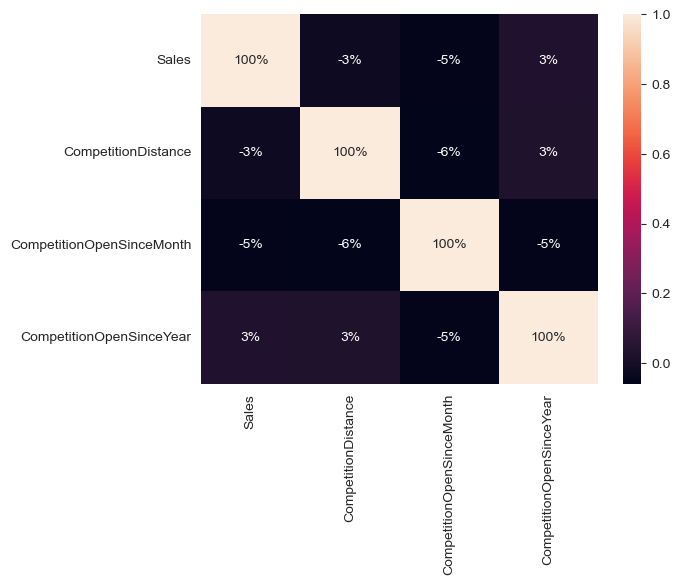

In [1111]:
# Das eben zusammengefasste Dataframe wird nun mit dem ersten Dataframe zusammengeführt um den Einfluss der Wettbewerber (Competition) auf die Sales zu bestimmen )
df_merged = pd.merge(df1, df3, on="Store")
df_merged.head()

#
#die Korrelation zwischen den Spalten Sales und CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear wird in einer Heatmap dargestellt
sns.heatmap(df_merged[["Sales", "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]].corr(), annot=True, fmt=".0%")

### Als nächstes wird ein genauer Blick auf den Zusammenhang zwischen Sales und dem Wochentag geworfen
#### Dafür wird ein neues Dataframe mit dem Namen df_Date erstellt, hier werden anders als bei df_merged die Store_IDs nicht zusammengefasst um den unterschied zwischen den Wochentagen hervorheben zu können

In [1112]:
df_date = pd.merge(df1, df2, on="Store")
df_date.head(5) 

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


<AxesSubplot:xlabel='DayOfWeek', ylabel='Sales'>

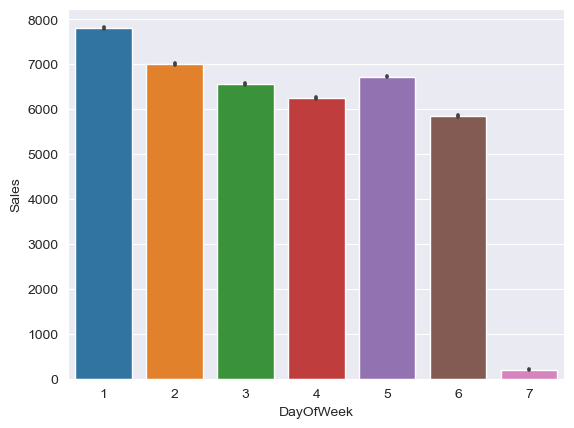

In [1113]:
# Die Sales werden nach Wochentag gruppiert und in einem Säulendiagramm dargestellt
sns.barplot(x="DayOfWeek", y="Sales", data=df_date)


#### Anhand des Graphen kann man erkennen, dass Montags und Freitags in der Regel die höchsten Umsätze generiert werden

<AxesSubplot:>

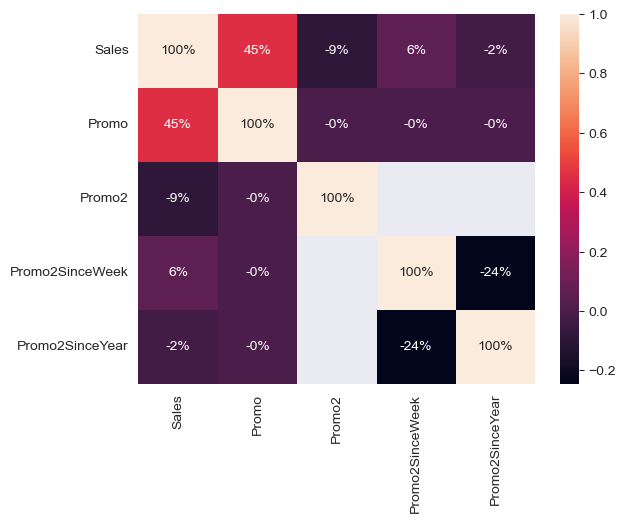

In [1114]:


# Es wird eine Heatmap erstellt, um die Korrelation zwischen Sales und Promo, Promo2, Promo2SinceWeek und Promo2SinceYear zu bestimmen
sns.heatmap(df_date[["Sales", "Promo", "Promo2", "Promo2SinceWeek", "Promo2SinceYear"]].corr(), annot=True, fmt=".0%")

### Die Spalten "Promo2" "Promo2SinceWeek" und "Promo2SinceYear" werden entfernt, da diese zu wenig Einfluss auf die Sales haben und lediglich die Dauer der Promotion anzeigen, während der Fakt das eine Promotion stattfindet bereits durch die Spalte Promo geklärt wird, darüber hinaus fehlen 50% der Datensätze, was eine Auswertung erschwert.

## Kapitel 2: Data Cleaning
### Nachdem in den Insights die Daten gesichtet und inital nach wichtigkeit Bewertet wurden, geht es nun beim Datacleaning darum die Daten so aufzubereiten, dass die KI-Modelle später mit ihnen arbeiten können und vorhersagen treffen können 

#### Es wird nocheinmal ein Blick auf die Daten geworfen nun mit dem Ziel sie mittels Datacleaning Methoden für die KI-Verfahren Nuztbar zu machen

In [1115]:
# kurzer Überblick über die Daten in dem Dataframe df1
print(df1.shape[0])
print(df1.info())
df1.head(10)

1115
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
None


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [1116]:
# Ein kurzer Überblick über die Daten in dem Dataframe df2

print(df2.shape[0])
print(df2.info())
df2.head(10)

1017209
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


## Spalten entfernen
Da wir durch eine Korrelation herausgefunden haben, dass die drei Spalten "CompetitionDistance", "CompetitionOpenSinceMonth" und "CompetitionOpenSinceYear" nur geringfügig mit den "Sales" zusammenhängt, werden diese aus dem Datenframe entfernt.

In [1117]:

# Die Spalten CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear werden entfernt
df1.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'], axis=1, inplace=True)

print(df1.info())
df1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Store                1115 non-null   int64  
 1   StoreType            1115 non-null   object 
 2   Assortment           1115 non-null   object 
 3   CompetitionDistance  1112 non-null   float64
 4   Promo2               1115 non-null   int64  
 5   Promo2SinceWeek      571 non-null    float64
 6   Promo2SinceYear      571 non-null    float64
 7   PromoInterval        571 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 69.8+ KB
None


,Store,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,0,NaN,NaN,NaN
1,2,a,a,570.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,0,NaN,NaN,NaN
5,6,a,a,310.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,0,NaN,NaN,NaN


In [1118]:
def drop_competition_cols(dataframe):
    dataframe.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'], axis=1, inplace=True)
    return dataframe

In [1119]:
# Eine Funktion für das mergen der Dataframes wird erstellt
def merge_df(dataframe, dataframe2):
    return pd.merge(dataframe, dataframe2, on='Store', how='left')


In [1120]:
# Funktion zum Splitten der Spalte Date in die Spalten Year, Month und Day wird erstellt
def split_date(dataframe):
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    dataframe['Year'] = dataframe['Date'].dt.year
    dataframe['Month'] = dataframe['Date'].dt.month
    dataframe['Day'] = dataframe['Date'].dt.day
    return dataframe

## Promo 2 Spalten werden entfernt
Die Spalten "Promo2" "Promo2SinceWeek", "Promo2SinceYear" und "PromoInterval" werden entfernt, da diese zu wenig Einfluss auf die Sales haben und lediglich die Dauer der Promotion anzeigen, während der Fakt das eine Promotion stattfindet bereits durch die Spalte Promo geklärt wird, darüber hinaus fehlen 50% der Datensätze, was eine Auswertung erschwert.

In [1121]:
# Funktion zum Entfernen der Spalten Promo2, Promo2SinceWeek, Promo2SinceYear und PromoInterval wird erstellt
def drop_promo2_cols(dataframe):
    dataframe.drop(['Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], axis=1, inplace=True)
    return dataframe

In [1122]:
# Funktion zum Entfernen der Spalte Date wird erstellt
def drop_date_col(dataframe):
    dataframe.drop(['Date'], axis=1, inplace=True)
    return dataframe

In [1123]:
def avg_customers(dataframe):
    for i in range(1, 1116):
        dataframe.loc[dataframe['Store'] == i, 'Customers'] = dataframe.loc[dataframe['Store'] == i, 'Customers'].mean()
    return dataframe


In [1124]:
# replace 0 with '0'
# Eine Funktion zum Ersetzen der 0 mit '0' wird erstellt
def replace_zero(dataframe):
    dataframe['StateHoliday'] = dataframe['StateHoliday'].replace(0, '0')
    return dataframe


In [1125]:
def fill_competition_distance(dataframe):
    dataframe['CompetitionDistance'].fillna(dataframe['CompetitionDistance'].mean(), inplace=True)

In [1126]:
def fill_open(dataframe):
    # replace NaN with 1
    dataframe['Open'].fillna(1, inplace=True)

In [1127]:
#for each row in the dataframe


In [1128]:
# Die Spalten StateHoliday, StoreType, Assortment werden in numerische Werte umgewandelt mittels Label Encoding
from sklearn.preprocessing import LabelEncoder

# Eine Funktion zum Label Encoding wird erstellt
def label_encoding(dataframe):
    le = LabelEncoder()
    dataframe['StateHoliday'] = le.fit_transform(dataframe['StateHoliday'])
    dataframe['StoreType'] = le.fit_transform(dataframe['StoreType'])
    dataframe['Assortment'] = le.fit_transform(dataframe['Assortment'])

    return dataframe

## Kaptiel 3: KI Modelle 
### In diesem Kaptiel wird versucht mittels verschiedener KI-Modelle die Sales eines Stores vorherzusagen 

In [1129]:
#Die benötigten Bibliotheken werden importiert
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#import pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing



In [1130]:
#create an empty dataframe copy the merged dataframe


In [1131]:
df_merged2 = merge_df(df1, df2)
split_date(df_merged2)
drop_promo2_cols(df_merged2)
drop_date_col(df_merged2)
replace_zero(df_merged2)
label_encoding(df_merged2)
avg_customers(df_merged2)
fill_competition_distance(df_merged2)
fill_open(df_merged2)
#drop_competition_cols(df_merged2)



In [1132]:
#for each store print the customers mean


In [1133]:
df_merged2.head(3000)

,Store,StoreType,Assortment,CompetitionDistance,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,2,0,1270.0,5,5263,467.646497,1,1,0,1,2015,7,31
1,1,2,0,1270.0,4,5020,467.646497,1,1,0,1,2015,7,30
2,1,2,0,1270.0,3,4782,467.646497,1,1,0,1,2015,7,29
3,1,2,0,1270.0,2,5011,467.646497,1,1,0,1,2015,7,28
4,1,2,0,1270.0,1,6102,467.646497,1,1,0,1,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,4,2,2,620.0,4,8239,1100.057325,1,0,0,0,2015,2,12
2996,4,2,2,620.0,3,7317,1100.057325,1,0,0,0,2015,2,11
2997,4,2,2,620.0,2,7914,1100.057325,1,0,0,0,2015,2,10
2998,4,2,2,620.0,1,8940,1100.057325,1,0,0,0,2015,2,9


In [1134]:
df_merged2.isnull().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
DayOfWeek              0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
Year                   0
Month                  0
Day                    0
dtype: int64

In [1135]:
# Aus dem Dataframe df_merged2 wird ein neues Dataframe df_merged2_sample erstellt, welches nur 10000 zufällige Zeilen enthält
df_merged2_sample = df_merged2.sample(n=10000, random_state=1)

from sklearn.model_selection import train_test_split

# Die Spalte Sales wird als Zielvariable definiert
y = df_merged2_sample['Sales']

x = df_merged2_sample.drop(['Sales'], axis=1)

# Die Daten werden in Trainings- und Testdaten aufgeteilt
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)






In [1136]:
#import preprocessing
from sklearn import preprocessing
pipeline = make_pipeline(preprocessing.StandardScaler(),
                                     RandomForestRegressor(n_estimators=100,
                                                           random_state=123))

In [1137]:
hyperparameters = { 'randomforestregressor__max_features' : [2, 4],
                    'randomforestregressor__max_depth': [10, 5],
                    'randomforestregressor__n_estimators': [50, 200]}

In [1138]:
clf = GridSearchCV(pipeline, hyperparameters, cv=10)

# Fit and tune model
clf.fit(x_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=123))]),
             param_grid={'randomforestregressor__max_depth': [10, 5],
                         'randomforestregressor__max_features': [2, 4],
                         'randomforestregressor__n_estimators': [50, 200]})

In [1139]:
print( clf.best_params_ )

{'randomforestregressor__max_depth': 10, 'randomforestregressor__max_features': 4, 'randomforestregressor__n_estimators': 200}


0.828307947899142


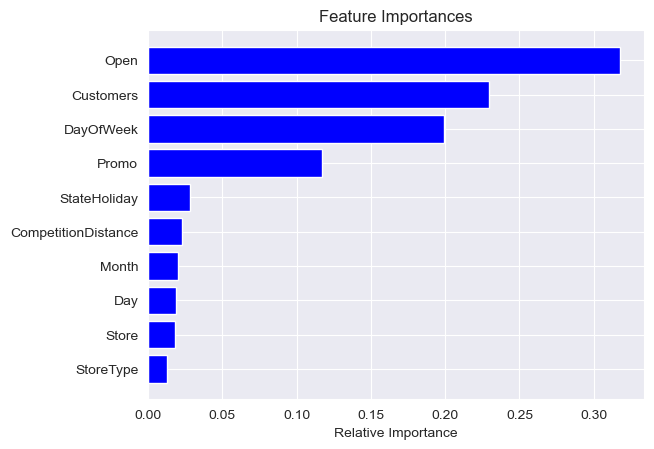

In [1140]:
y_pred = clf.predict(x_test)
print( r2_score(y_test, y_pred) )

#Die wichtigsten Features werden in einem Säulendiagramm dargestellt
importances = clf.best_estimator_.named_steps['randomforestregressor'].feature_importances_
features = x.columns
indices = np.argsort(importances)[-10:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [1141]:
# Es wird ein DecisionTree erstellt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create Decision Tree classifer object
regr = DecisionTreeRegressor(random_state=0)

# Train Decision Tree Classifer
regr = regr.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = regr.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",r2_score(y_test, y_pred))



Accuracy: 0.7227462564695786


In [1142]:
# Ein AdaBoost wird erstellt
from sklearn.ensemble import AdaBoostRegressor

# Create AdaBoost classifer object
regr = AdaBoostRegressor(random_state=0, n_estimators=100)

# Train AdaBoost Classifer
regr = regr.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = regr.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",r2_score(y_test, y_pred))

Accuracy: 0.6587190583870968


In [1143]:
#ein GradientBoosting wird erstellt
from sklearn.ensemble import GradientBoostingRegressor

# Create GradientBoosting classifer object
regr = GradientBoostingRegressor(random_state=0, n_estimators=100)

# Train GradientBoosting Classifer
regr = regr.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = regr.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",r2_score(y_test, y_pred))

Accuracy: 0.8424380427208235


In [1144]:
#make a knn model
from sklearn.neighbors import KNeighborsRegressor

# Create KNeighborsRegressor classifer object
regr = KNeighborsRegressor(n_neighbors=5)

# Train KNeighborsRegressor Classifer
regr = regr.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = regr.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",r2_score(y_test, y_pred))


Accuracy: 0.19026243526969622


Accuracy: 0.88899893046127


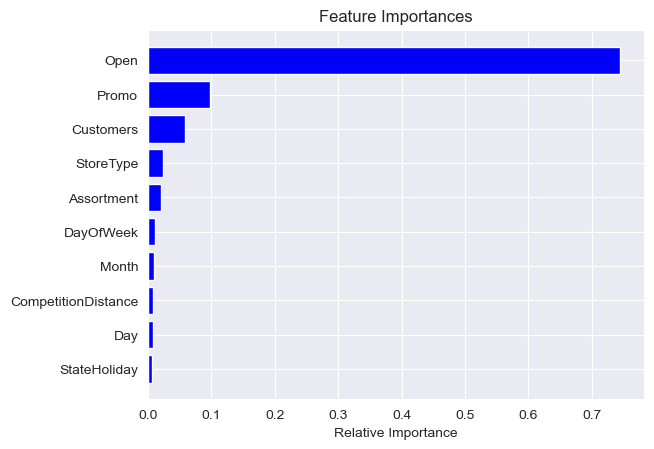

In [1145]:
# Ein XGBoost wird erstellt
from xgboost import XGBRegressor

# Create XGBRegressor classifer object
regr = XGBRegressor(random_state=0, n_estimators=100)

# Train XGBRegressor Classifer
regr = regr.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = regr.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",r2_score(y_test, y_pred))

#feature importance
importances = regr.feature_importances_
features = x.columns
indices = np.argsort(importances)[-10:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [1146]:
# make an ensemble model of the best models
from sklearn.ensemble import VotingRegressor

# Create VotingRegressor classifer object
ensemble = VotingRegressor(estimators=[('dt', DecisionTreeRegressor(random_state=0)), ('ab', AdaBoostRegressor(random_state=0, n_estimators=100)), ('gb', GradientBoostingRegressor(random_state=0, n_estimators=100)), ('xgb', XGBRegressor(random_state=0, n_estimators=100))])

# Train VotingRegressor Classifer
ensemble = ensemble.fit(x_train,y_train)

#Predict the response for test dataset
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",r2_score(y_test, y_pred))





Accuracy: 0.88899893046127


In [1147]:
df_test=pd.read_csv("test.csv")
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [1148]:
#make a df with the id and store columns from df_test


In [1149]:
# combine the df_test_merged dataframe with the df_customers dataframe

df_test_merged=merge_df(df1, df_test)


In [1150]:
split_date(df_test_merged)
drop_promo2_cols(df_test_merged)
drop_date_col(df_test_merged)
replace_zero(df_test_merged)
label_encoding(df_test_merged)
fill_competition_distance(df_test_merged)
fill_open(df_test_merged)
#drop_competition_cols(df_test_merged)


In [1151]:
#df_test_merged.head().sort_values(by='Id')
# sort the df_test_merged by Id
df_test_merged.sort_values(by='Id', inplace=True)
df_test_merged.head()
df_test_merged.tail()


,Store,StoreType,Assortment,CompetitionDistance,Id,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
40478,1093,2,2,10450.0,NaN,NaN,1.0,NaN,2,NaN,NaN,NaN,NaN
40527,1095,0,0,690.0,NaN,NaN,1.0,NaN,2,NaN,NaN,NaN,NaN
40624,1098,0,0,1830.0,NaN,NaN,1.0,NaN,2,NaN,NaN,NaN,NaN
41057,1108,0,0,540.0,NaN,NaN,1.0,NaN,2,NaN,NaN,NaN,NaN
41106,1110,2,2,900.0,NaN,NaN,1.0,NaN,2,NaN,NaN,NaN,NaN


In [1152]:
df_test_merged.head()

,Store,StoreType,Assortment,CompetitionDistance,Id,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,2,0,1270.0,1.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0
49,3,0,0,14130.0,2.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0
100,7,0,2,24000.0,3.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0
148,8,0,0,7520.0,4.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0
196,9,0,2,2030.0,5.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0


In [1153]:
#submission_df=pd.DataFrame({"Id": df_test["Id"], "Sales": sales})
#submission_df


In [1154]:
# drop all rows with null values in df_test_merged
df_test_merged.dropna(inplace=True)

In [1155]:
df_test_merged.head()

,Store,StoreType,Assortment,CompetitionDistance,Id,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,2,0,1270.0,1.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0
49,3,0,0,14130.0,2.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0
100,7,0,2,24000.0,3.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0
148,8,0,0,7520.0,4.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0
196,9,0,2,2030.0,5.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0


In [1156]:
#make a dataframe with the store from df_merged2


In [1157]:
#merge the df_customers with the df_test_merged


In [1158]:
#sort the df_test_merged by Index
df_test_merged.sort_index(inplace=True)
df_test_merged.head()

,Store,StoreType,Assortment,CompetitionDistance,Id,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,2,0,1270.0,1.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0
1,1,2,0,1270.0,857.0,3.0,1.0,1.0,0,0.0,2015.0,9.0,16.0
2,1,2,0,1270.0,1713.0,2.0,1.0,1.0,0,0.0,2015.0,9.0,15.0
3,1,2,0,1270.0,2569.0,1.0,1.0,1.0,0,0.0,2015.0,9.0,14.0
4,1,2,0,1270.0,3425.0,7.0,0.0,0.0,0,0.0,2015.0,9.0,13.0


In [1159]:
#make a cpoy of df_merged2
df_customers=df_merged2.copy()

In [1160]:
df_customers = df_customers[['Store', 'Customers']]
df_customers.head()

,Store,Customers
0,1,467.646497
1,1,467.646497
2,1,467.646497
3,1,467.646497
4,1,467.646497


In [1161]:
#count how many rows with the same store number there are
df_customers.groupby('Store').count()

#942
df_customers_stores_sorted = df_customers.groupby('Store').sum()
#count the amount of customers for each store and divide it by the number of rows with the same store number




In [1162]:
df_customers_stores_sorted.head()

,Customers
Store,
1,440523.0
2,457855.0
3,584310.0
4,1036254.0
5,418588.0


In [1163]:
#for each store divide the number of customers by the number of rows with the same store number

In [1164]:
#for each row divide the value in customers by the 942
df_customers_stores_sorted['Customers'] = df_customers_stores_sorted['Customers'] / 942

In [1165]:
df_customers_stores_sorted.head()

,Customers
Store,
1,467.646497
2,486.045648
3,620.286624
4,1100.057325
5,444.360934


In [1166]:
# merge the df_customers_stores_sorted with the df_test_merged on the store column
df_test_merged = pd.merge(df_test_merged, df_customers_stores_sorted, on='Store')

df.test_merged.head()

In [1167]:
df_test_merged.head(50)

,Store,StoreType,Assortment,CompetitionDistance,Id,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Customers
0,1,2,0,1270.0,1.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0,467.646497
1,1,2,0,1270.0,857.0,3.0,1.0,1.0,0,0.0,2015.0,9.0,16.0,467.646497
2,1,2,0,1270.0,1713.0,2.0,1.0,1.0,0,0.0,2015.0,9.0,15.0,467.646497
3,1,2,0,1270.0,2569.0,1.0,1.0,1.0,0,0.0,2015.0,9.0,14.0,467.646497
4,1,2,0,1270.0,3425.0,7.0,0.0,0.0,0,0.0,2015.0,9.0,13.0,467.646497
5,1,2,0,1270.0,4281.0,6.0,1.0,0.0,0,0.0,2015.0,9.0,12.0,467.646497
6,1,2,0,1270.0,5137.0,5.0,1.0,0.0,0,0.0,2015.0,9.0,11.0,467.646497
7,1,2,0,1270.0,5993.0,4.0,1.0,0.0,0,0.0,2015.0,9.0,10.0,467.646497
8,1,2,0,1270.0,6849.0,3.0,1.0,0.0,0,0.0,2015.0,9.0,9.0,467.646497
9,1,2,0,1270.0,7705.0,2.0,1.0,0.0,0,0.0,2015.0,9.0,8.0,467.646497


In [1168]:
df_test_merged.sort_values(by='Id', inplace=True)

In [1169]:
df_test_merged.head(50)

,Store,StoreType,Assortment,CompetitionDistance,Id,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Customers
0,1,2,0,1270.0,1.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0,467.646497
48,3,0,0,14130.0,2.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0,620.286624
96,7,0,2,24000.0,3.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0,791.474522
144,8,0,0,7520.0,4.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0,547.799363
192,9,0,2,2030.0,5.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0,479.487261
240,10,0,0,3160.0,6.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0,494.332272
288,11,0,2,960.0,7.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0,940.543524
336,12,0,2,1070.0,8.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0,746.508493
384,13,3,0,310.0,9.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0,252.377919
432,14,0,0,1300.0,10.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0,522.200637


In [1170]:
#copy the df_test_merged dataframe
df_test_merged_raw=df_test_merged.copy()

In [1171]:
#drop the ID column
df_test_merged_raw.drop(columns=['Id'], inplace=True)

In [1172]:
df_test_merged_raw.head()

,Store,StoreType,Assortment,CompetitionDistance,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Customers
0,1,2,0,1270.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0,467.646497
48,3,0,0,14130.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0,620.286624
96,7,0,2,24000.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0,791.474522
144,8,0,0,7520.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0,547.799363
192,9,0,2,2030.0,4.0,1.0,1.0,0,0.0,2015.0,9.0,17.0,479.487261


In [1173]:
#make clomun customers the sixth column
cols = list(df_test_merged_raw.columns.values)
cols.pop(cols.index('Customers'))
df_test_merged_raw = df_test_merged_raw[['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day']]

In [1174]:
df_test_merged_raw.head()

,Store,StoreType,Assortment,CompetitionDistance,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,1,2,0,1270.0,4.0,467.646497,1.0,1.0,0,0.0,2015.0,9.0,17.0
48,3,0,0,14130.0,4.0,620.286624,1.0,1.0,0,0.0,2015.0,9.0,17.0
96,7,0,2,24000.0,4.0,791.474522,1.0,1.0,0,0.0,2015.0,9.0,17.0
144,8,0,0,7520.0,4.0,547.799363,1.0,1.0,0,0.0,2015.0,9.0,17.0
192,9,0,2,2030.0,4.0,479.487261,1.0,1.0,0,0.0,2015.0,9.0,17.0


In [1175]:
preds = ensemble.predict(df_test_merged_raw)
Sales = np.exp(preds)

C:\Users\Ronal\AppData\Local\Temp\ipykernel_8404\2888631178.py:2: RuntimeWarning: overflow encountered in exp
  Sales = np.exp(preds)


In [1176]:
#sort the df_test_merged by Id
df_test_merged.sort_values(by='Id', inplace=True)

In [1177]:
print(preds)


[ 6479.42449695  8442.1958251   9986.30175477 ...  6085.15502181
 19546.93200233  6199.96445589]


In [1178]:
#make a dataframe with the Id and Sales columns
submission_df=pd.DataFrame({"Id": df_test_merged["Id"], "Sales": preds})

In [ ]:
#convert the Id column to int
submission_df['Id'] = submission_df['Id'].astype(int)

In [1183]:

submission_df.to_csv("submission2.csv", index=False, header=True, sep=',', encoding='utf-8')

In [1182]:
#convert the Id column to int
submission_df['Id'] = submission_df['Id'].astype(int)

In [1180]:
#show the rows where the id is in df_test but not in df_test_merged
df_test[~df_test['Id'].isin(df_test_merged['Id'])]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday


In [1184]:
submission_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      41088 non-null  int32  
 1   Sales   41088 non-null  float64
dtypes: float64(1), int32(1)
memory usage: 802.5 KB


In [1185]:
submission_df2=pd.read_csv("submission2.csv")
submission_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      41088 non-null  int64  
 1   Sales   41088 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 642.1 KB
